# Covid-19 Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. This project is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the [https://en.wikipedia.org/wiki/COVID-19_recession] all the way to recession in recent 2022.

#### Project By : K.P.S.Shivratna

## Getting the Data

For getting the data I utilized the IEX Cloud Services which provide Market Stocks related data for recent 15 Years. [ https://iexcloud.io/ ]

Utilised Pandas Datareader to get the data. I have collected stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

Basic implementations requirements :
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.


In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
#Setting up the duration through which we want to study the Market
start  = datetime.datetime(2010,1,1)
end = datetime.datetime(2022,1,1)

In [3]:
#Auth Key for accessing the Cloud API provided by IEX Cloud
import os
os.environ["IEX_API_KEY"] = "pk_9ae9032a5e4c4899a930bc717907846e"

In [4]:
#Bank of America
BAC = data.DataReader('BAC','iex',start,end)

#CitiBank
C = data.DataReader('C','iex',start,end)

#Goldman Sachs
GS = data.DataReader('GS','iex',start,end)

#JP Morgan
JPM = data.DataReader('JPM','iex',start,end)

#Morgan Stanley
MS = data.DataReader('MS','iex',start,end)

#Wells Fargo
WFC = data.DataReader('WFC','iex',start,end)

In [5]:
#Sample data view of Bank of America
BAC.head()

,open,high,low,close,volume
date,,,,,
2010-01-04,15.24,15.750,15.12,15.69,180845102
2010-01-05,15.74,16.210,15.70,16.20,209521213
2010-01-06,16.21,16.540,16.03,16.39,205257888
2010-01-07,16.68,17.185,16.51,16.93,320868357
2010-01-08,16.98,17.100,16.63,16.78,220104605


#### Creating a list of the ticker symbols (as strings) in alphabetical order. 
Naming this list: tickers

* A stock ticker reports transaction and price data for a security, updated continuously throughout the day.
* A stock ticker typically reports on the most active securities or ones making headlines on a given day.
* The ticker typically shows the ticker symbol, the price change and percentage change from the previous session's close, and often the volume of the shares being traded.
* Some tickers color code information to reflect the direction of the price, with green for higher, red for lower, and a neutral color like gray or tan for no change.

In [6]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

**Used pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.**

In [7]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker    BAC                                        C                    \
Stock Info    open    high    low  close       volume  open  high   low close   
date                                                                            
2010-01-04   15.24  15.750  15.12  15.69  180845102.0  3.36  3.41  3.34  3.40   
2010-01-05   15.74  16.210  15.70  16.20  209521213.0  3.42  3.55  3.41  3.53   
2010-01-06   16.21  16.540  16.03  16.39  205257888.0  3.56  3.68  3.51  3.64   
2010-01-07   16.68  17.185  16.51  16.93  320868357.0  3.69  3.70  3.61  3.65   
2010-01-08   16.98  17.100  16.63  16.78  220104605.0  3.65  3.67  3.51  3.59   

Bank Ticker               ...     MS                                      WFC  \
Stock Info        volume  ...   open    high    low  close      volume   open   
date                      ...                                                   
2010-01-04   406793465.0  ...  30.70  31.968  30.63  30.91  20373994.0  27.02   
2010-01-05   668617075.0  ...  31.01  32.130  30.93  32.04  22523317.0  27.27   
2010-01-06   674338827.0  ...  31.97  32.590  31.79  32.45  17029777.0  28.03   
2010-01-07   672451816.0  ...  32.46  33.270  32.27  32.92  18692919.0  28.12   
2010-01-08   624097685.0  ...  32.60  32.820  31.98  32.25  15994905.0  28.90   

Bank Ticker                                 
Stock Info    high    low  close    volume  
date                                        
2010-01-04   27.48  26.82  27.32  39338101  
2010-01-05   28.24  27.24  28.07  55418926  
2010-01-06   28.33  27.79  28.11  33239586  
2010-01-07   29.43  27.92  29.13  61648945  
2010-01-08   29.35  28.60  28.86  35512359  

[5 rows x 30 columns]

## Analyzing the data


In [8]:
# Maximum Stock Closing Price for each and every Bank

In [9]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     48.37
C       81.91
GS     423.85
JPM    171.78
MS     105.45
WFC     65.93
dtype: float64

**Creating a new empty DataFrame called returns. This dataframe will contain the Returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

Return on stock is equal to the sum of all dividends yielded from the stock and the stock capital gain minus the initial cost of the investment divided by the initial cost value for investment, end result is multiplied by 100 to convert into percentage.

In [10]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Returns']=bank_stocks[tick]['close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.032505,0.038235,0.017680,0.019370,0.036558,0.027452
2010-01-06,0.011728,0.031161,-0.010673,0.005495,0.012797,0.001425
2010-01-07,0.032947,0.002747,0.019568,0.019809,0.014484,0.036286
2010-01-08,-0.008860,-0.016438,-0.018911,-0.002456,-0.020352,-0.009269


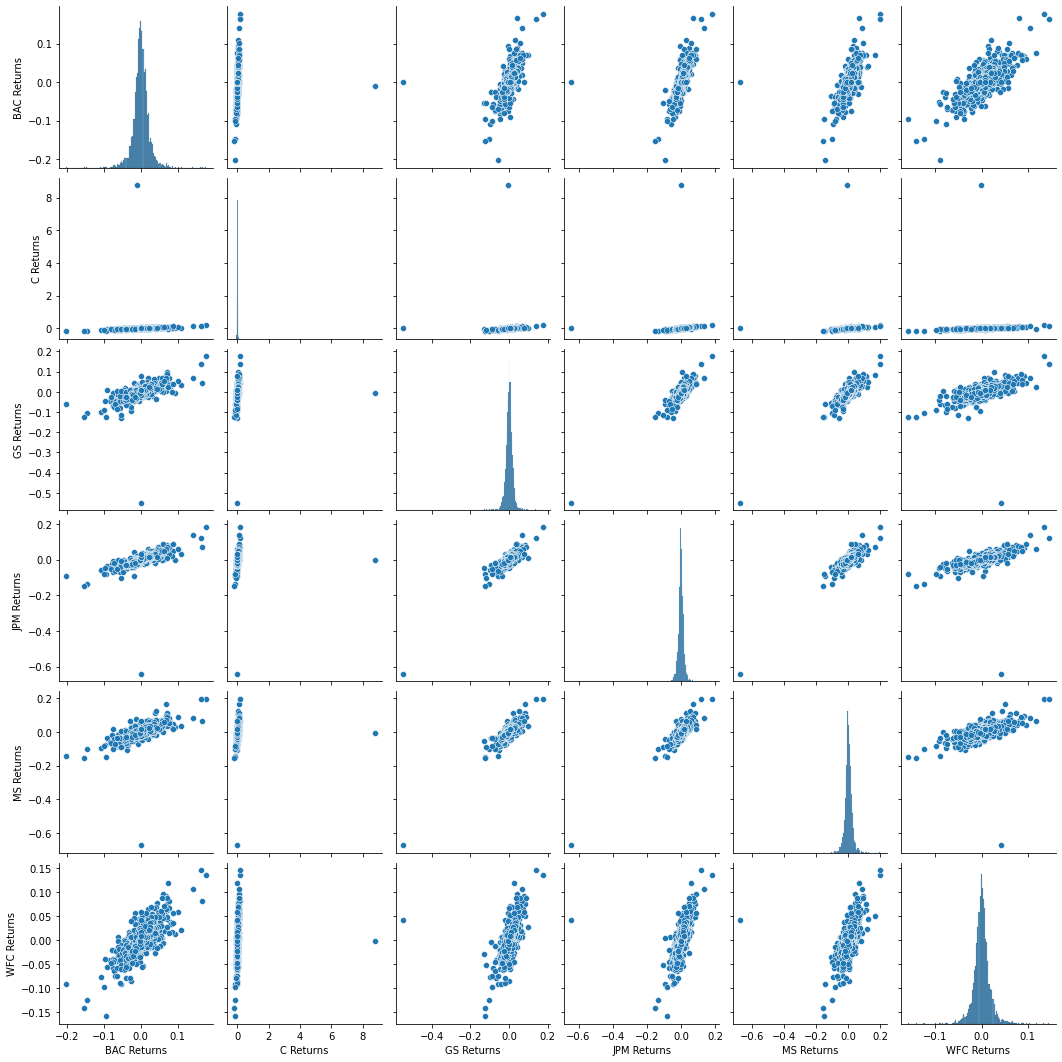

In [11]:
import seaborn as sns
sns.pairplot(returns[1:])

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

In [12]:
# More analysis and plotting for study
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

In [13]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

### Analysis
As we can interpret the biggest dip in the market for selected set of Company stocks we can notice the Dip on 23-MARCH-2020
https://www.businesstoday.in/markets/market-perspective/story/share-market-live-sensex-nifty-dalal-street-stock-outlook-news-on-march-23-yes-bank-aster-dm-healthcare-welspun-torrent-power-252839-2020-03-23 

#### Indian stocks suffer worst day in history as coronavirus shuts businesses, cities
By Reuters Staff
(Updates to closing levels)

* BENGALURU, March 23 (Reuters) - The Indian stock market on Monday suffered its worst single-day rout in history and the rupee plunged more than 1%, with investors stuck in a selling frenzy as the coronavirus disrupted businesses and forced several districts into lockdown.